# Task - 2
# Analyze the feasibility and potential profitability of high-frequency trading strategies based on aggregated trades data
So in this task we will be using RandomForestClassifier algorithm to classify the data into profitable or non profitable. It builds multiple decision trees and merges them together to obtain a more accurate and stable prediction. In this task we are just looking at the previous data to identify whether it is profitable and then fitting it to the model.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("BTCUSDT-aggTrades-2023-11.csv")

features = df[['price', 'quantity']]
df['profitable'] = df['price'].diff().shift(-1) > 0
df = df.dropna()

X_train, X_test, y_train, y_test = train_test_split(features, df['profitable'], test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.5753739930955121


In this code I have plotted a subset of the data given it was taking too much time

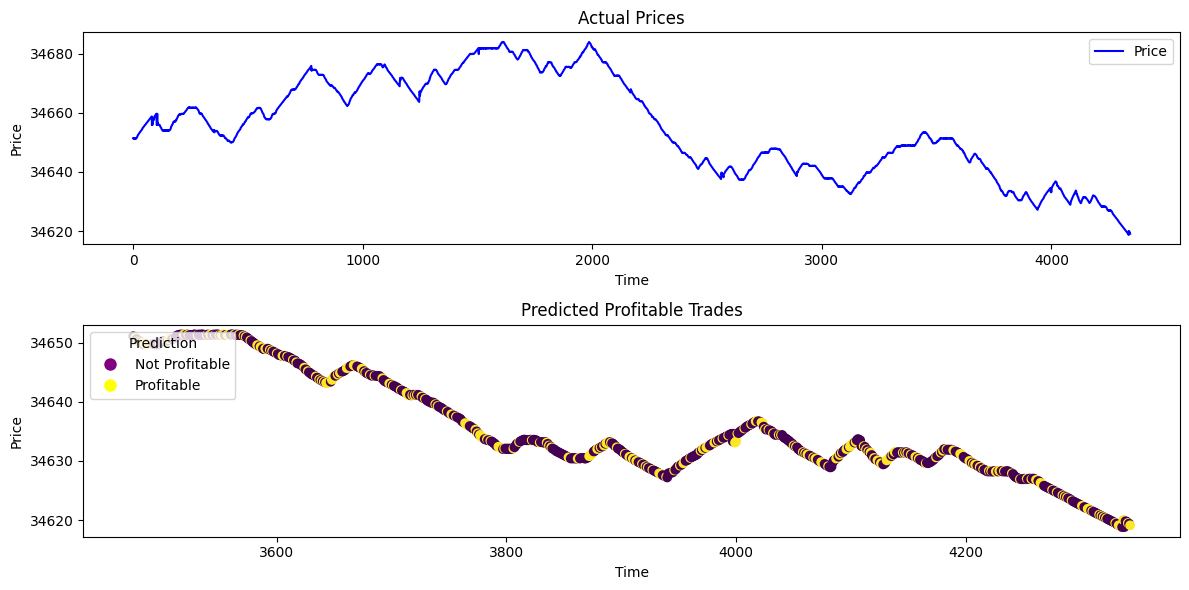

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df.index, df['price'], label='Price', color='blue')
plt.title('Actual Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

plt.subplot(2, 1, 2)
scatter = plt.scatter(df.index[-len(predictions):], df['price'].iloc[-len(predictions):], c=predictions, cmap='viridis')
plt.title('Predicted Profitable Trades')
plt.xlabel('Time')
plt.ylabel('Price')

legend_labels = {0: 'Not Profitable', 1: 'Profitable'}
colors = {0: 'purple', 1: 'yellow'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=label) for i, label in legend_labels.items()]
plt.legend(handles=handles, title='Prediction', loc='upper left')

plt.tight_layout()
plt.show()